In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project1/forestfires.csv")

In [3]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [8]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [9]:
# order label encoding
order_label_for_month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
order_label_for_day = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
data['month'] = data['month'].map(order_label_for_month)
data['day'] = data['day'].map(order_label_for_day)
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
data.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

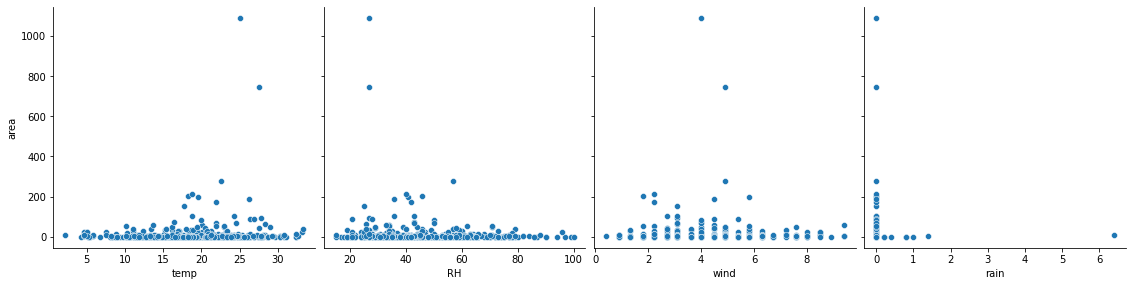

'\nplt.rcParams[\'figure.figsize\'] = [8, 8]\nsns.set(style = "white", font_scale = 1.3)\nscat = sns.scatterplot(x = data[\'temp\'],y =  data[\'area\'])\nscat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");\n'

In [11]:
# scatter plot
sns.pairplot(data, x_vars=['temp','RH', 'wind','rain'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()
'''
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(x = data['temp'],y =  data['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");
'''


# For temp

In [12]:
X = data[['temp']]
y = data['area']
y.shape, X.shape

((517,), (517, 1))

In [13]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [14]:
# creating object of LinearRegression
lr_model_temp = LinearRegression()
lr_model_temp.fit(X_train,y_train)
print("Intercept value: ",lr_model_temp.intercept_)
print("Coefficient value: ",lr_model_temp.coef_)

Intercept value:  -9.918731768692343
Coefficient value:  [1.22883937]


In [15]:
# Prediction and scoring
predictions = lr_model_temp.predict(X_test)
lr_model_temp.score(X_test,y_test)

-0.02501388761387613

In [16]:
# Error Scores
mse_temp = mean_squared_error(y_test, predictions)
r2_temp = r2_score(y_test, predictions)
print ("Mean Squared Error for temp: ", mse_temp)
print ("R2 Score for temp: ", r2_temp)

Mean Squared Error for temp:  1064.6507792650978
R2 Score for temp:  -0.02501388761387613


# For RH

In [17]:
X = data[['RH']]
y = data['area']
y.shape, X.shape

((517,), (517, 1))

In [18]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [19]:
# creating LinearRegression model for RH
lr_model_RH = LinearRegression()
lr_model_RH.fit(X_train,y_train)
print("Intercept value: ",lr_model_RH.intercept_)
print("Coefficient value: ",lr_model_RH.coef_)

Intercept value:  27.76516948566806
Coefficient value:  [-0.32759455]


In [20]:
# Prediction and scoring
predictions = lr_model_RH.predict(X_test)
lr_model_RH.score(X_test,y_test)

-0.0021392256291015155

In [21]:
# Error Scores
mse_RH = mean_squared_error(y_test, predictions)
r2_RH = r2_score(y_test, predictions)
print ("Mean Squared Error for RH: ", mse_RH)
print ("R2 Score for RH: ", r2_RH)

Mean Squared Error for RH:  1040.891562924909
R2 Score for RH:  -0.0021392256291015155


# For wind

In [22]:
X = data[['wind']]
y = data['area']
y.shape, X.shape

((517,), (517, 1))

In [23]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [24]:
# creating LinearRegression model for RH
lr_model_wind = LinearRegression()
lr_model_wind.fit(X_train,y_train)
print("Intercept value: ",lr_model_wind.intercept_)
print("Coefficient value: ",lr_model_wind.coef_)

Intercept value:  10.570600039144828
Coefficient value:  [0.64137855]


In [25]:
# Prediction and scoring
predictions = lr_model_wind.predict(X_test)
lr_model_wind.score(X_test,y_test)

-0.005275133531305487

In [26]:
# Error Scores
mse_wind = mean_squared_error(y_test, predictions)
r2_wind = r2_score(y_test, predictions)
print ("Mean Squared Error for wind: ", mse_wind)
print ("R2 Score for wind: ", r2_wind)

Mean Squared Error for wind:  1044.1487351760645
R2 Score for wind:  -0.005275133531305487


# For rain

In [27]:
X = data[['rain']]
y = data['area']
y.shape, X.shape

((517,), (517, 1))

In [28]:
#spliting data into 80-20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",y_train.shape)
print("Shape of y_test= ",y_test.shape)

Shape of X_train=  (413, 1)
Shape of X_test=  (104, 1)
Shape of y_train=  (413,)
Shape of y_test=  (104,)


In [29]:
# creating LinearRegression model for RH
lr_model_rain = LinearRegression()
lr_model_rain.fit(X_train,y_train)
print("Intercept value: ",lr_model_rain.intercept_)
print("Coefficient value: ",lr_model_rain.coef_)

Intercept value:  13.200965995357848
Coefficient value:  [-1.33789561]


In [30]:
# Prediction and scoring
predictions = lr_model_rain.predict(X_test)
lr_model_rain.score(X_test,y_test)

-0.0021773458726295214

In [31]:
# Error Scores
mse_rain = mean_squared_error(y_test, predictions)
r2_rain = r2_score(y_test, predictions)
print ("Mean Squared Error for rain: ", mse_rain)
print ("R2 Score for rain: ", r2_rain)

Mean Squared Error for rain:  1040.93115726355
R2 Score for rain:  -0.0021773458726295214


# Tabluate data

In [32]:
tabulateData = {'Mean square error':[mse_temp, mse_RH, mse_wind, mse_rain],
        'R2':[r2_temp,r2_RH,r2_wind,r2_rain]}
tabulateDF = pd.DataFrame(tabulateData, index =['Temp', 'RH','Wind','Rain'])
tabulateDF

,Mean square error,R2
Temp,1064.650779,-0.025014
RH,1040.891563,-0.002139
Wind,1044.148735,-0.005275
Rain,1040.931157,-0.002177
